First we install kaggle and make a directory named kaggle.
We upload our kaggle.json file and move the file to the directory.
We grant the necessary permissions to the directory.
And then we download our dataset.

In [ ]:
! pip install -q kaggle

In [ ]:
 ! mkdir ~/.kaggle

In [ ]:
! cp kaggle.json ~/.kaggle/

In [ ]:
! chmod 600 ~/.kaggle/kaggle.json

In [ ]:
! kaggle datasets download -d eimadevyni/car-model-variants-and-images-dataset

100% 7.03G/7.04G [01:18<00:00, 171MB/s]
100% 7.04G/7.04G [01:18<00:00, 96.5MB/s]


We unzip our downloaded data.


In [ ]:
! unzip car-model-variants-and-images-dataset.zip

Streaming output truncated to the last 5000 lines.
  inflating: train/VOLKSWAGEN_Phaeton_20022009/VOLKSWAGENPhaeton-718_7.jpg  
  inflating: train/VOLKSWAGEN_Phaeton_20102016/VOLKSWAGENPhaeton-4283_1.jpg  
  inflating: train/VOLKSWAGEN_Phaeton_20102016/VOLKSWAGENPhaeton-4283_10.jpg  
  inflating: train/VOLKSWAGEN_Phaeton_20102016/VOLKSWAGENPhaeton-4283_12.jpg  
  inflating: train/VOLKSWAGEN_Phaeton_20102016/VOLKSWAGENPhaeton-4283_13.jpg  
  inflating: train/VOLKSWAGEN_Phaeton_20102016/VOLKSWAGENPhaeton-4283_14.jpg  
  inflating: train/VOLKSWAGEN_Phaeton_20102016/VOLKSWAGENPhaeton-4283_15.jpg  
  inflating: train/VOLKSWAGEN_Phaeton_20102016/VOLKSWAGENPhaeton-4283_16.jpg  
  inflating: train/VOLKSWAGEN_Phaeton_20102016/VOLKSWAGENPhaeton-4283_17.jpg  
  inflating: train/VOLKSWAGEN_Phaeton_20102016/VOLKSWAGENPhaeton-4283_18.jpg  
  inflating: train/VOLKSWAGEN_Phaeton_20102016/VOLKSWAGENPhaeton-4283_19.jpg  
  inflating: train/VOLKSWAGEN_Phaeton_20102016/VOLKSWAGENPhaeton-4283_2.jpg  
  inf

We import the fastai necessary functions. Create a folder called data and move our train and test folders there. and then create a DataBlock and a dataset.


In [ ]:
from fastai.data.all import *
from fastai.vision.all import *

In [ ]:
dblock = DataBlock(blocks    = (ImageBlock, CategoryBlock),
                   get_items = get_image_files,
                   get_y     = parent_label,
                   splitter = GrandparentSplitter(train_name="test", valid_name="train"),
                   item_tfms=[Resize(192, method='squish')],
                   )

dsets = dblock.datasets("/content/data/")
dsets.train[0]

(PILImage mode=RGB size=512x512, TensorCategory(1029))

In [ ]:
dsets.vocab


['1921_Maybach_Typ_W3_2270HP_Convertible', '1930_MercedesBenz_Grosser_Mercedes_W07_Pullman', '1939_MercedesBenz_770_Grosser_Mercedes_Pullman', '1955_Chrysler_C300', '1961_MercedesBenz_220_SE_Coupe', '1962_BMW_3200_CS', '1963_MErcedesBenz_SL_W113', '1966_Dodge_Charger', '1969_Dino_246_GT', '1969_Ford_Capri', '1970_Lincoln_Continental_fourdoor', '1971_Maserati_Bora', '1972_Peugeot_104', '1980_Ferrari_Mondial_8', '1983_Alfa_Romeo_Arna', '1984_BMW_M635_CSi_E24', '1986_Citroen_BX', '1988_Volkswagen_Passat', '1989_Opel_Vectra_Hatchback', '1992_Cadillac_Eldorado_TC', '1993_Jeep_Grand_Cherokee_ZJ', '1994_Fiat_Coupe', '1994_Saab_900_Cabrio', '1995_MG_F', '1995_MercedesBenz_EClass', '1996_Volvo_C70_Coupe', '1997_Honda_Accord_Sedan__CF8', '1997_Renault_Espace', '1999_SEAT_Toledo', '2000_BMW_3_Series_Cabriolet', '2000_MercedesBenz_CL_W215', '2000_Opel_Astra_OPC_3doors', '2000_Skoda_Fabia_Hatchback', '2000_Toyota_Corolla_Sedan', '2001_Acura_MDX', '2001_Nissan_XTrail', '2001_Suzuki_AerioLiana_Hatchb

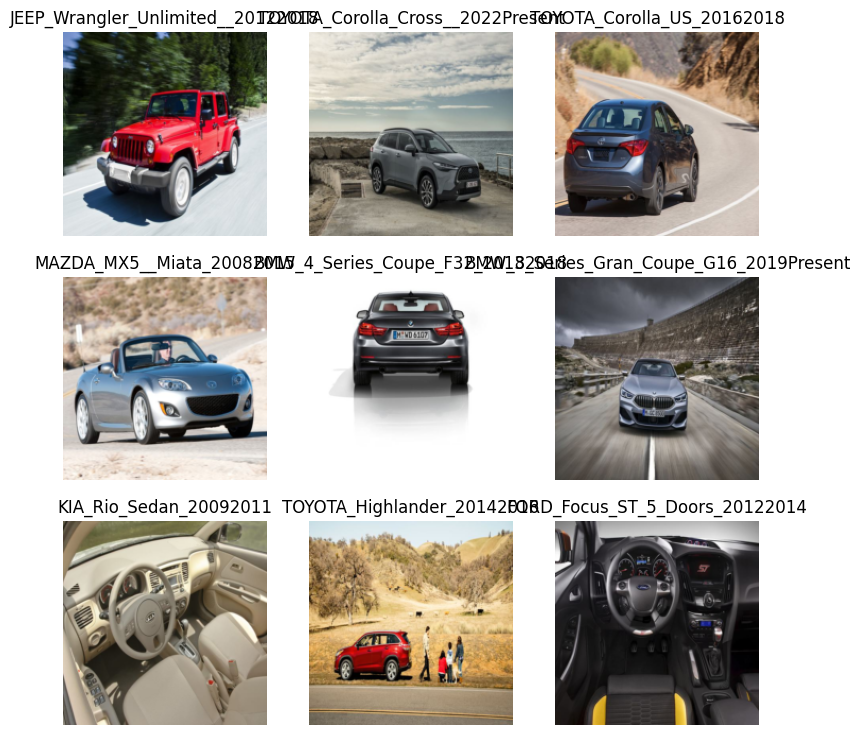

In [ ]:
dls = dblock.dataloaders("/content/data/")
dls.show_batch()


We load our model and load any previous model if you are continuing training if not discard load method. And then we save our model and choose the appropriate name

In [ ]:
learn = vision_learner(dls, resnet50, metrics=error_rate)
learn.load("/content/MyModel3")
learn.fine_tune(6)
learn.save("MyModel4")

If you're satsfied with the result export your model

In [ ]:
learn.export("ModelFinal")